# Create input files with all interactions

You can download the dataset from : https://zhanggroup.org/GLASS/

In [1]:
# read important libs
import pandas as pd, numpy as np
import matplotlib
#import deepchem
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
import matplotlib

In [2]:
tot_int=pd.read_csv('interactions_total.tsv',sep='\t')
tot_int.head(2)

,UniProt ID,InChI Key,Parameter,Value,Unit,Database Source,Database Target ID,Database Ligand ID,Reference
0,O95136,XTUSMJNHGPASSE-UHFFFAOYSA-N,EC50,>10000,nM,ChEMBL,CHEMBL2955,CHEMBL1455786,PubChem BioAssay data set
1,P41146,DWZCXYUZSXSRCU-OQYWAUBWSA-N,IC50,1.7,nM,BindingDB,NaN,50372277,18068993


In [3]:
tot_int["InChI Key"]

0          XTUSMJNHGPASSE-UHFFFAOYSA-N
1          DWZCXYUZSXSRCU-OQYWAUBWSA-N
2          KQAXOVRIAHANRP-UHFFFAOYSA-N
3          LENKUUPXOOPDDB-HXUWFJFHSA-N
4          KWNYPHGYOPXYPZ-UHFFFAOYSA-N
                      ...             
1045676    LXGOBFZKOTZTKI-UHFFFAOYSA-N
1045677    WDJALAMRYSCDQD-RPWUZVMVSA-N
1045678    WGDLKKMGZLAZSL-UHFFFAOYSA-N
1045679    XIJHWXXXIMEHKW-JRVZRWKPSA-N
1045680    CSSVMZXGVYOUCF-CQSZACIVSA-N
Name: InChI Key, Length: 1045681, dtype: object

In [4]:
ligand=pd.read_csv('ligands.tsv',sep='\t')
ligand.head(2)

,Ligand Name,CID,Molecular Formula,Molecular Weight,IUPAC Name,Canonical SMILES,Isomeric SMILES,InChI Std. ID,InChI Key,XlogP,Hydrogen Bond Donors,Hydrogen Bond Acceptors
0,CHEMBL314213,10381677,C17H19N5O2,325.372,3-[2-(dimethylamino)ethyl]-N-(3-nitropyridin-2...,CN(C)CCC1=CNC2=C1C=C(C=C2)NC3=C(C=CC=N3)[N+](=...,CN(C)CCC1=CNC2=C1C=C(C=C2)NC3=C(C=CC=N3)[N+](=...,InChI=1S/C17H19N5O2/c1-21(2)9-7-12-11-19-15-6-...,SZQUYNBBTURBHB-UHFFFAOYSA-N,3.5,2.0,5.0
1,CHEMBL608293,46875323,C14H20N6O5,352.351,"(2S,3S,4R)-5-(6-aminopurin-9-yl)-3,4-dihydroxy...",CC(C)CONC(=O)C1C(C(C(O1)N2C=NC3=C2N=CN=C3N)O)O,CC(C)CONC(=O)[C@@H]1[C@H]([C@H](C(O1)N2C=NC3=C...,InChI=1S/C14H20N6O5/c1-6(2)3-24-19-13(23)10-8(...,GCWNBWOAXTZZMS-JDSSLJPYSA-N,0.3,4.0,9.0


In [5]:
target=pd.read_csv('targets.tsv',sep='\t')
target.head()

,GPCR Name,UniProt ID,Gene Name,Species,FASTA Sequence
0,Growth hormone secretagogue receptor type 1,Q92847,GHSR,Homo sapiens (Human),MWNATPSEEPGFNLTLADLDWDASPGNDSLGDELLQLFPAPLLAGV...
1,Probable G-protein coupled receptor,Q91178,NaN,Oryzias latipes (Japanese rice fish),MMADKTSPMITSDHSISNFSTGLFGPHPTVPPDVGVVTSSQSQMKD...
2,C-X-C chemokine receptor type 6,Q9N0Z0,CXCR6,Cercocebus atys (Sooty mangabey),MAEYDHYEDDEFFNSFNDSSQKEHQDFLQFSKVFLPCMYLVVFVCG...
3,Gamma-aminobutyric acid type B receptor subunit 2,O88871,Gabbr2,Rattus norvegicus (Rat),MASPPSSGQPRPPPPPPPPARLLLPLLLSLLLWLAPGAWGWTRGAP...
4,C-X-C chemokine receptor type 3,Q5MD61,CXCR3,Bos taurus (Bovine),MVPEMSERQEFQASDFAYLLENSSYDYGENETYFCCTSPPCPQDFS...


In [6]:
tot_int.groupby(['Database Source']).count()

,UniProt ID,InChI Key,Parameter,Value,Unit,Database Target ID,Database Ligand ID,Reference
Database Source,,,,,,,,
BindingDB,351137,351137,351137,351137,351137,0,351137,295580
ChEMBL,673967,673967,673967,673967,673967,673967,673967,673967
DrugBank,2213,2213,0,0,0,2213,2213,0
IUPHAR,6270,6270,6270,6270,6270,6270,6270,6270
PDSP,12094,12094,12094,12094,12094,0,0,12094


In [7]:
tot_int.groupby(['Parameter']).count()

,UniProt ID,InChI Key,Value,Unit,Database Source,Database Target ID,Database Ligand ID,Reference
Parameter,,,,,,,,
% binding,10,10,10,10,10,10,10,10
% recovery,40,40,40,40,40,40,40,40
%max,2220,2220,2220,2220,2220,2220,2220,2220
-Delta G,83,83,83,83,83,83,83,83
-Log EC20,20,20,20,20,20,20,20,20
...,...,...,...,...,...,...,...,...
ppKb,1,1,1,1,1,1,1,1
selectivity,6,6,6,6,6,6,6,6
sigmaH,7,7,7,7,7,7,7,7


In [8]:
#outer_merged = pd.merge(interactions_actives_kd, ligand, how="outer", on=["InChI Key"])
outer_merged_ligand = pd.merge(tot_int, ligand, how="outer", on=["InChI Key"])
outer_merged_ligand.head()
outer_merged_ligand.shape

(1045682, 20)

In [9]:
outer_merged_ligand.head(2)

,UniProt ID,InChI Key,Parameter,Value,Unit,Database Source,Database Target ID,Database Ligand ID,Reference,Ligand Name,CID,Molecular Formula,Molecular Weight,IUPAC Name,Canonical SMILES,Isomeric SMILES,InChI Std. ID,XlogP,Hydrogen Bond Donors,Hydrogen Bond Acceptors
0,O95136,XTUSMJNHGPASSE-UHFFFAOYSA-N,EC50,>10000,nM,ChEMBL,CHEMBL2955,CHEMBL1455786,PubChem BioAssay data set,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Q99500,XTUSMJNHGPASSE-UHFFFAOYSA-N,EC50,2700,nM,BindingDB,NaN,37340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# join with target
#outer_merged = pd.merge(interactions_actives_kd, ligand, how="outer", on=["InChI Key"])
outer_merged_tl = pd.merge(outer_merged_ligand, target, how="outer", on=["UniProt ID"])
outer_merged_tl.head()
outer_merged_tl.shape

(1048005, 24)

In [11]:
outer_merged_tl.head(2)

,UniProt ID,InChI Key,Parameter,Value,Unit,Database Source,Database Target ID,Database Ligand ID,Reference,Ligand Name,...,Canonical SMILES,Isomeric SMILES,InChI Std. ID,XlogP,Hydrogen Bond Donors,Hydrogen Bond Acceptors,GPCR Name,Gene Name,Species,FASTA Sequence
0,O95136,XTUSMJNHGPASSE-UHFFFAOYSA-N,EC50,>10000,nM,ChEMBL,CHEMBL2955,CHEMBL1455786,PubChem BioAssay data set,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Sphingosine 1-phosphate receptor 2,S1PR2,Homo sapiens (Human),MGSLYSEYLNPNKVQEHYNYTKETLETQETTSRQVASAFIVILCCA...
1,O95136,XTUSMJNHGPASSE-UHFFFAOYSA-N,EC50,>50000,nM,ChEMBL,CHEMBL2955,CHEMBL1455786,24135724,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Sphingosine 1-phosphate receptor 2,S1PR2,Homo sapiens (Human),MGSLYSEYLNPNKVQEHYNYTKETLETQETTSRQVASAFIVILCCA...


In [12]:
ligand_gpcr_tot_int= outer_merged_tl.dropna()
ligand_gpcr_tot_int.shape

(49340, 24)

In [13]:
ligand_gpcr_tot_int.head(2)

,UniProt ID,InChI Key,Parameter,Value,Unit,Database Source,Database Target ID,Database Ligand ID,Reference,Ligand Name,...,Canonical SMILES,Isomeric SMILES,InChI Std. ID,XlogP,Hydrogen Bond Donors,Hydrogen Bond Acceptors,GPCR Name,Gene Name,Species,FASTA Sequence
54,O95136,CLTJXNBVCMJRPD-UHFFFAOYSA-N,IC50,980,nM,ChEMBL,CHEMBL2955,CHEMBL3401379,25746814,CHEMBL3401379,...,CCC(CC)CC1(CCN(CC1)C(=O)NC2=CC(=CC(=C2)OC3=CC=...,CCC(CC)CC1(CCN(CC1)C(=O)NC2=CC(=CC(=C2)OC3=CC=...,InChI=1S/C30H34F2N2O4/c1-3-21(4-2)20-30(36)13-...,6.8,2.0,6.0,Sphingosine 1-phosphate receptor 2,S1PR2,Homo sapiens (Human),MGSLYSEYLNPNKVQEHYNYTKETLETQETTSRQVASAFIVILCCA...
94,O95136,KKGQTZUTZRNORY-UHFFFAOYSA-N,IC50,>10000,nM,ChEMBL,CHEMBL2955,CHEMBL314854,15615513,Fingolimod,...,CCCCCCCCC1=CC=C(C=C1)CCC(CO)(CO)N,CCCCCCCCC1=CC=C(C=C1)CCC(CO)(CO)N,InChI=1S/C19H33NO2/c1-2-3-4-5-6-7-8-17-9-11-18...,4.2,3.0,3.0,Sphingosine 1-phosphate receptor 2,S1PR2,Homo sapiens (Human),MGSLYSEYLNPNKVQEHYNYTKETLETQETTSRQVASAFIVILCCA...


In [14]:
ligand_gpcr_tot_int.to_csv('ligand_gpcr_tot_int.csv')

In [15]:
#ligand_gpcr_tot_int.groupby(['Parameter']).count()
by_parameter =ligand_gpcr_tot_int.groupby("Parameter")
print(by_parameter)

In [16]:
 by_parameter.groups["Kd"]

Int64Index([ 154997,  155571,  155593,  157226,  158017,  164035,  166465,
             179691,  179693,  188226,
            ...
            1040389, 1041279, 1041379, 1044441, 1044509, 1044517, 1044573,
            1045192, 1045501, 1045658],
           dtype='int64', length=616)

In [17]:
interactions_actives_kd = by_parameter.get_group("Kd")
interactions_actives_kd.head(2)

,UniProt ID,InChI Key,Parameter,Value,Unit,Database Source,Database Target ID,Database Ligand ID,Reference,Ligand Name,...,Canonical SMILES,Isomeric SMILES,InChI Std. ID,XlogP,Hydrogen Bond Donors,Hydrogen Bond Acceptors,GPCR Name,Gene Name,Species,FASTA Sequence
154997,P41146,DBXXUNROIBQTKD-XFQSCKMHSA-N,Kd,4073.8,nM,ChEMBL,CHEMBL2014,CHEMBL3808415,27035422,CHEMBL3808415,...,CCC(C)C(C(=O)NC(CCCCN)C(=O)N)NC(=O)C(CCCN=C(N)...,CC[C@H](C)[C@@H](C(=O)N[C@@H](CCCCN)C(=O)N)NC(...,InChI=1S/C72H107N21O13/c1-5-40(2)60(68(105)86-...,-0.9,20.0,18.0,Nociceptin receptor,OPRL1,Homo sapiens (Human),MEPLFPAPFWEVIYGSHLQGNLSLLSPNHSLLPPHLLLNASHGAFL...
155571,P41146,PULGYDLMFSFVBL-SMFNREODSA-N,Kd,0.19,nM,ChEMBL,CHEMBL2014,CHEMBL396460,25284251,BDBM21842,...,CC(C)CC(C(=O)NC(C)C(=O)NC(CC(=O)N)C(=O)NC(CCC(...,C[C@H]([C@@H](C(=O)NCC(=O)N[C@@H](C)C(=O)N[C@@...,InChI=1S/C79H129N27O22/c1-41(2)33-54(72(122)95...,-11.0,28.0,27.0,Nociceptin receptor,OPRL1,Homo sapiens (Human),MEPLFPAPFWEVIYGSHLQGNLSLLSPNHSLLPPHLLLNASHGAFL...


In [18]:
interactions_actives_kd.groupby(['Database Source']).count()

,UniProt ID,InChI Key,Parameter,Value,Unit,Database Target ID,Database Ligand ID,Reference,Ligand Name,CID,...,Canonical SMILES,Isomeric SMILES,InChI Std. ID,XlogP,Hydrogen Bond Donors,Hydrogen Bond Acceptors,GPCR Name,Gene Name,Species,FASTA Sequence
Database Source,,,,,,,,,,,,,,,,,,,,,
ChEMBL,558,558,558,558,558,558,558,558,558,558,...,558,558,558,558,558,558,558,558,558,558
IUPHAR,58,58,58,58,58,58,58,58,58,58,...,58,58,58,58,58,58,58,58,58,58


In [19]:
interactions_actives_kd.to_csv('tot_interactions_actives_kd.csv')

In [20]:
mol_smile_tot_interaction_kd = interactions_actives_kd ['Canonical SMILES']
mol_smile_tot_interaction_kd.head(2)

#first_column = mol_smile_tot_interaction_kd.pop('Canonical SMILES')
#first_column 

154997    CCC(C)C(C(=O)NC(CCCCN)C(=O)N)NC(=O)C(CCCN=C(N)...
155571    CC(C)CC(C(=O)NC(C)C(=O)NC(CC(=O)N)C(=O)NC(CCC(...
Name: Canonical SMILES, dtype: object

In [21]:
mol_smile_tot_interaction_kd.to_csv('mol_smile_tot_interaction_kd.csv')

In [22]:
interactions_actives_kd.head(2)

,UniProt ID,InChI Key,Parameter,Value,Unit,Database Source,Database Target ID,Database Ligand ID,Reference,Ligand Name,...,Canonical SMILES,Isomeric SMILES,InChI Std. ID,XlogP,Hydrogen Bond Donors,Hydrogen Bond Acceptors,GPCR Name,Gene Name,Species,FASTA Sequence
154997,P41146,DBXXUNROIBQTKD-XFQSCKMHSA-N,Kd,4073.8,nM,ChEMBL,CHEMBL2014,CHEMBL3808415,27035422,CHEMBL3808415,...,CCC(C)C(C(=O)NC(CCCCN)C(=O)N)NC(=O)C(CCCN=C(N)...,CC[C@H](C)[C@@H](C(=O)N[C@@H](CCCCN)C(=O)N)NC(...,InChI=1S/C72H107N21O13/c1-5-40(2)60(68(105)86-...,-0.9,20.0,18.0,Nociceptin receptor,OPRL1,Homo sapiens (Human),MEPLFPAPFWEVIYGSHLQGNLSLLSPNHSLLPPHLLLNASHGAFL...
155571,P41146,PULGYDLMFSFVBL-SMFNREODSA-N,Kd,0.19,nM,ChEMBL,CHEMBL2014,CHEMBL396460,25284251,BDBM21842,...,CC(C)CC(C(=O)NC(C)C(=O)NC(CC(=O)N)C(=O)NC(CCC(...,C[C@H]([C@@H](C(=O)NCC(=O)N[C@@H](C)C(=O)N[C@@...,InChI=1S/C79H129N27O22/c1-41(2)33-54(72(122)95...,-11.0,28.0,27.0,Nociceptin receptor,OPRL1,Homo sapiens (Human),MEPLFPAPFWEVIYGSHLQGNLSLLSPNHSLLPPHLLLNASHGAFL...


In [23]:
# remove all > or<  - sign in the kd value
clean_data = interactions_actives_kd.Value[interactions_actives_kd.Value.str.contains(r'[@<>#&$""%+-/*]')]
clean_data
mol_tot_interaction_kd_value = clean_data

In [24]:
mol_tot_interaction_kd_value.to_csv('kd_clean.csv', sep=' ')
mol_tot_interaction_kd_value.to_csv('mol_tot_interaction_kd_value.csv', sep=' ')
mol_tot_interaction_kd_value.to_csv('mol_tot_interaction_kd_value.smi', sep=' ')
mol_smile_tot_interaction_kd.to_csv('mol_smile_tot_interaction_kd.smi',  sep=' ')

# Clean kd dataset and make it ready for the fingerprint's code in gc3kd 

In [25]:
df=pd.read_csv('mol_smile_tot_interaction_kd.csv')
df

,Unnamed: 0,Canonical SMILES
0,154997,CCC(C)C(C(=O)NC(CCCCN)C(=O)N)NC(=O)C(CCCN=C(N)...
1,155571,CC(C)CC(C(=O)NC(C)C(=O)NC(CC(=O)N)C(=O)NC(CCC(...
2,155593,CC(C)CC(C(=O)NC(C)C(=O)NC(CC(=O)N)C(=O)NC(CCC(...
3,157226,CCC(C)C(C(=O)NC(CCCCN)C(=O)N)NC(=O)C(CCCN=C(N)...
4,158017,CC1=CC(=CC(=C1CC(C(=O)NC(CCCNC(=N)N)C(=O)NC2CC...
...,...,...
611,1044517,CCNC(=O)C1CCCN1C(=O)C(CCCN=C(N)N)NC(=O)C(CC(C)...
612,1044573,CCNC(=O)C1CCCN1C(=O)C(CCCN=C(N)N)NC(=O)C(CC(C)...
613,1045192,C1CCC2C(C1)CC(N2C(=O)C3CC4=CC=CC=C4CN3C(=O)C(C...
614,1045501,CC1=CC2=C(C=C1)C(=NN(C(=O)N2C3=CC=C(C=C3)NCCC4...


In [26]:
# change the label's name
df = df.rename(columns={"Unnamed: 0":"ID"})
df = df.rename(columns={"Canonical SMILES":"smiles"})
df

,ID,smiles
0,154997,CCC(C)C(C(=O)NC(CCCCN)C(=O)N)NC(=O)C(CCCN=C(N)...
1,155571,CC(C)CC(C(=O)NC(C)C(=O)NC(CC(=O)N)C(=O)NC(CCC(...
2,155593,CC(C)CC(C(=O)NC(C)C(=O)NC(CC(=O)N)C(=O)NC(CCC(...
3,157226,CCC(C)C(C(=O)NC(CCCCN)C(=O)N)NC(=O)C(CCCN=C(N)...
4,158017,CC1=CC(=CC(=C1CC(C(=O)NC(CCCNC(=N)N)C(=O)NC2CC...
...,...,...
611,1044517,CCNC(=O)C1CCCN1C(=O)C(CCCN=C(N)N)NC(=O)C(CC(C)...
612,1044573,CCNC(=O)C1CCCN1C(=O)C(CCCN=C(N)N)NC(=O)C(CC(C)...
613,1045192,C1CCC2C(C1)CC(N2C(=O)C3CC4=CC=CC=C4CN3C(=O)C(C...
614,1045501,CC1=CC2=C(C=C1)C(=NN(C(=O)N2C3=CC=C(C=C3)NCCC4...


In [27]:
first_col = df.pop('smiles')
df

,ID
0,154997
1,155571
2,155593
3,157226
4,158017
...,...
611,1044517
612,1044573
613,1045192
614,1045501


In [28]:
df.insert(0, "smiles", first_col)
df

,smiles,ID
0,CCC(C)C(C(=O)NC(CCCCN)C(=O)N)NC(=O)C(CCCN=C(N)...,154997
1,CC(C)CC(C(=O)NC(C)C(=O)NC(CC(=O)N)C(=O)NC(CCC(...,155571
2,CC(C)CC(C(=O)NC(C)C(=O)NC(CC(=O)N)C(=O)NC(CCC(...,155593
3,CCC(C)C(C(=O)NC(CCCCN)C(=O)N)NC(=O)C(CCCN=C(N)...,157226
4,CC1=CC(=CC(=C1CC(C(=O)NC(CCCNC(=N)N)C(=O)NC2CC...,158017
...,...,...
611,CCNC(=O)C1CCCN1C(=O)C(CCCN=C(N)N)NC(=O)C(CC(C)...,1044517
612,CCNC(=O)C1CCCN1C(=O)C(CCCN=C(N)N)NC(=O)C(CC(C)...,1044573
613,C1CCC2C(C1)CC(N2C(=O)C3CC4=CC=CC=C4CN3C(=O)C(C...,1045192
614,CC1=CC2=C(C=C1)C(=NN(C(=O)N2C3=CC=C(C=C3)NCCC4...,1045501


In [29]:
df.to_csv('smile_kd.smi',  sep=' ')

In [30]:
# index the id from the dataset
df[['smiles','ID']].to_csv('train.smi', header=None, index=False, sep=' ')
df_noid = df["smiles"]
df_noid

0      CCC(C)C(C(=O)NC(CCCCN)C(=O)N)NC(=O)C(CCCN=C(N)...
1      CC(C)CC(C(=O)NC(C)C(=O)NC(CC(=O)N)C(=O)NC(CCC(...
2      CC(C)CC(C(=O)NC(C)C(=O)NC(CC(=O)N)C(=O)NC(CCC(...
3      CCC(C)C(C(=O)NC(CCCCN)C(=O)N)NC(=O)C(CCCN=C(N)...
4      CC1=CC(=CC(=C1CC(C(=O)NC(CCCNC(=N)N)C(=O)NC2CC...
                             ...                        
611    CCNC(=O)C1CCCN1C(=O)C(CCCN=C(N)N)NC(=O)C(CC(C)...
612    CCNC(=O)C1CCCN1C(=O)C(CCCN=C(N)N)NC(=O)C(CC(C)...
613    C1CCC2C(C1)CC(N2C(=O)C3CC4=CC=CC=C4CN3C(=O)C(C...
614    CC1=CC2=C(C=C1)C(=NN(C(=O)N2C3=CC=C(C=C3)NCCC4...
615                     CCCCCC=CCC(C=CC=CCC=CCCCC(=O)O)O
Name: smiles, Length: 616, dtype: object

In [31]:
df.to_csv('smile_index-kd.smi',  sep=' ')
df_noid.to_csv('smile_noid.smi', header=None, index=False,  sep=' ')

In [42]:
df_kd=pd.read_csv('tot_interactions_actives_kd.csv')
df_kd = df_kd.rename(columns={"Unnamed: 0":"ID"})

df_kd = df_kd.rename(columns={"Canonical SMILES":"smiles"})
df_kd.head(2)

,ID,UniProt ID,InChI Key,Parameter,Value,Unit,Database Source,Database Target ID,Database Ligand ID,Reference,...,smiles,Isomeric SMILES,InChI Std. ID,XlogP,Hydrogen Bond Donors,Hydrogen Bond Acceptors,GPCR Name,Gene Name,Species,FASTA Sequence
0,154997,P41146,DBXXUNROIBQTKD-XFQSCKMHSA-N,Kd,4073.8,nM,ChEMBL,CHEMBL2014,CHEMBL3808415,27035422,...,CCC(C)C(C(=O)NC(CCCCN)C(=O)N)NC(=O)C(CCCN=C(N)...,CC[C@H](C)[C@@H](C(=O)N[C@@H](CCCCN)C(=O)N)NC(...,InChI=1S/C72H107N21O13/c1-5-40(2)60(68(105)86-...,-0.9,20.0,18.0,Nociceptin receptor,OPRL1,Homo sapiens (Human),MEPLFPAPFWEVIYGSHLQGNLSLLSPNHSLLPPHLLLNASHGAFL...
1,155571,P41146,PULGYDLMFSFVBL-SMFNREODSA-N,Kd,0.19,nM,ChEMBL,CHEMBL2014,CHEMBL396460,25284251,...,CC(C)CC(C(=O)NC(C)C(=O)NC(CC(=O)N)C(=O)NC(CCC(...,C[C@H]([C@@H](C(=O)NCC(=O)N[C@@H](C)C(=O)N[C@@...,InChI=1S/C79H129N27O22/c1-41(2)33-54(72(122)95...,-11.0,28.0,27.0,Nociceptin receptor,OPRL1,Homo sapiens (Human),MEPLFPAPFWEVIYGSHLQGNLSLLSPNHSLLPPHLLLNASHGAFL...


In [43]:
df_kd = df_kd[["smiles","ID","Value"]]
df_kd

,smiles,ID,Value
0,CCC(C)C(C(=O)NC(CCCCN)C(=O)N)NC(=O)C(CCCN=C(N)...,154997,4073.8
1,CC(C)CC(C(=O)NC(C)C(=O)NC(CC(=O)N)C(=O)NC(CCC(...,155571,0.19
2,CC(C)CC(C(=O)NC(C)C(=O)NC(CC(=O)N)C(=O)NC(CCC(...,155593,0.092
3,CCC(C)C(C(=O)NC(CCCCN)C(=O)N)NC(=O)C(CCCN=C(N)...,157226,1.21
4,CC1=CC(=CC(=C1CC(C(=O)NC(CCCNC(=N)N)C(=O)NC2CC...,158017,1000
...,...,...,...
611,CCNC(=O)C1CCCN1C(=O)C(CCCN=C(N)N)NC(=O)C(CC(C)...,1044517,79.43
612,CCNC(=O)C1CCCN1C(=O)C(CCCN=C(N)N)NC(=O)C(CC(C)...,1044573,8.511
613,C1CCC2C(C1)CC(N2C(=O)C3CC4=CC=CC=C4CN3C(=O)C(C...,1045192,851.14
614,CC1=CC2=C(C=C1)C(=NN(C(=O)N2C3=CC=C(C=C3)NCCC4...,1045501,512.86


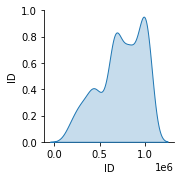

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df_kd[['Value', 'ID']], diag_kind='kde', kind='reg', markers='+')
plt.show()

In [35]:
numerics=pd.to_numeric(df_kd.Value, errors='coerce')
idx=numerics.isna()

0      False
1      False
2      False
3      False
4      False
       ...  
611    False
612    False
613    False
614    False
615    False
Name: Value, Length: 616, dtype: bool

In [45]:
numerics

0      4073.800
1         0.190
2         0.092
3         1.210
4      1000.000
         ...   
611      79.430
612       8.511
613     851.140
614     512.860
615       4.870
Name: Value, Length: 616, dtype: float64

In [46]:
idx

0      False
1      False
2      False
3      False
4      False
       ...  
611    False
612    False
613    False
614    False
615    False
Name: Value, Length: 616, dtype: bool

In [48]:
df_kd_num = df_kd[~idx]
df_kd_num

,smiles,ID,Value
0,CCC(C)C(C(=O)NC(CCCCN)C(=O)N)NC(=O)C(CCCN=C(N)...,154997,4073.8
1,CC(C)CC(C(=O)NC(C)C(=O)NC(CC(=O)N)C(=O)NC(CCC(...,155571,0.19
2,CC(C)CC(C(=O)NC(C)C(=O)NC(CC(=O)N)C(=O)NC(CCC(...,155593,0.092
3,CCC(C)C(C(=O)NC(CCCCN)C(=O)N)NC(=O)C(CCCN=C(N)...,157226,1.21
4,CC1=CC(=CC(=C1CC(C(=O)NC(CCCNC(=N)N)C(=O)NC2CC...,158017,1000
...,...,...,...
611,CCNC(=O)C1CCCN1C(=O)C(CCCN=C(N)N)NC(=O)C(CC(C)...,1044517,79.43
612,CCNC(=O)C1CCCN1C(=O)C(CCCN=C(N)N)NC(=O)C(CC(C)...,1044573,8.511
613,C1CCC2C(C1)CC(N2C(=O)C3CC4=CC=CC=C4CN3C(=O)C(C...,1045192,851.14
614,CC1=CC2=C(C=C1)C(=NN(C(=O)N2C3=CC=C(C=C3)NCCC4...,1045501,512.86


In [50]:
# choose 406 datpoint as a training and the rest of them as a test

df_train = df_kd_num.iloc[:406,:]
df_test = df_kd_num.iloc[407:,:]
df_test

,smiles,ID,Value
430,CN1C(C(=O)NC(C(=O)NC(C(=O)NC(C(=O)NC(CSSC2(CCC...,919907,6.3
431,CCC(C)C1C(=O)NC(C(=O)NC(C(=O)NC(CSSC2(CCCCC2)C...,919986,95.5
432,CC(C)C1C(=O)NC(C(=O)NC(CSSCC(C(=O)NC(C(=O)NC(C...,920394,1.66
433,CC(C)C1C(=O)NC(C(=O)NC(CSSCC(C(=O)NC(C(=O)NC(C...,920395,1.63
434,CC(C)C1C(=O)NC(C(=O)NC(CSSCC(C(=O)NC(C(=O)NC(C...,920396,1.82
...,...,...,...
611,CCNC(=O)C1CCCN1C(=O)C(CCCN=C(N)N)NC(=O)C(CC(C)...,1044517,79.43
612,CCNC(=O)C1CCCN1C(=O)C(CCCN=C(N)N)NC(=O)C(CC(C)...,1044573,8.511
613,C1CCC2C(C1)CC(N2C(=O)C3CC4=CC=CC=C4CN3C(=O)C(C...,1045192,851.14
614,CC1=CC2=C(C=C1)C(=NN(C(=O)N2C3=CC=C(C=C3)NCCC4...,1045501,512.86


In [51]:
df_train[['ID','Value']].to_csv('activity_train.smi', header=None, index=False, sep=' ')
df_train[['smiles','ID']].to_csv('train.smi', header=None, index=False, sep=' ')
df_test[['ID','Value']].to_csv('activity_test.smi', header=None, index=False, sep=' ')
df_test[['smiles','ID']].to_csv('test.smi', header=None, index=False, sep=' ')